In [1]:
import sys
sys.path.append("/cluster/home/yhgong/")

import matplotlib.pyplot as plt

from python.modules import *
plt.style.use('default')

In [2]:
simPath: str = "/lfs/data/yhgong/productionRun/single/HD/Cooling_Feedback_ContiRandom15"
hdf5Prefix: str = "perseus_merger_hdf5_plt_cnt"

### Turbulence Heating

In [13]:
result = TimeSeriesAnalyzor() \
    .setInputs(
        timeSeriesMode=TimeSeriesMode.TurbulenceHeating,
        simFile=SimFileModel(
            simPath=simPath,
            hdf5FilePrefix=hdf5Prefix,
            fileSterMyr=1
        ),
        calculationInfo=TurbulenceHeatingTimeSeriesCalculationInfoModel(
            tStartMyr=3100,
            tEndMyr=3300,
            tStepMyr=50,
            rKpc=100,
            shape=Shape.Box,
            rhoIndex=0
        )
    ) \
    .getData()

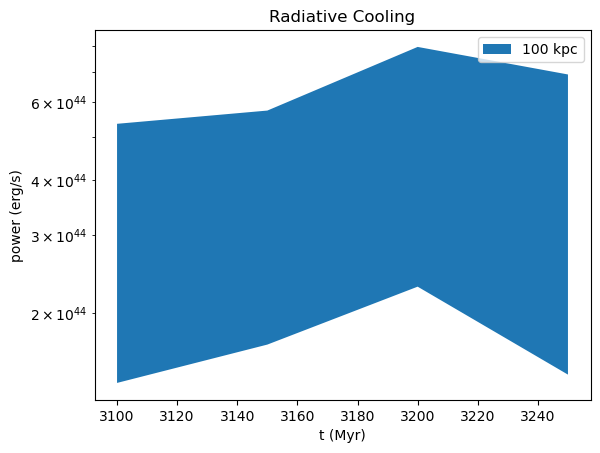

In [14]:
fig, ax = plt.subplots()

ax.fill_between(result.x, result.value.upperLimit, result.value.lowerLimit, \
    label=f"{result.label[0]} {result.label[1]}")
ax.set_title("Radiative Cooling")
ax.set_xlabel("t (Myr)")
ax.set_ylabel("power (erg/s)")
ax.set_yscale("log")
ax.legend()

### Jet Heating

In [7]:
result = TimeSeriesAnalyzor() \
    .setInputs(
        timeSeriesMode=TimeSeriesMode.JetPower,
        simFile=SimFileModel(
            simPath=simPath,
            hdf5FilePrefix=hdf5Prefix,
            fileSterMyr=1
        ),
        calculationInfo=JetPowerTimeSeriesCalculationInfoModel(
            tStartMyr=20,
            tEndMyr=3300
        )
    ) \
    .getData()

In [8]:
resultAvg = TimeSeriesAnalyzor() \
    .setInputs(
        timeSeriesMode=TimeSeriesMode.JetPower,
        simFile=SimFileModel(
            simPath=simPath,
            hdf5FilePrefix=hdf5Prefix,
            fileSterMyr=1
        ),
        calculationInfo=JetPowerTimeSeriesCalculationInfoModel(
            tStartMyr=20,
            tEndMyr=3300,
            smoothingMyr=20
        )
    ) \
    .getData()

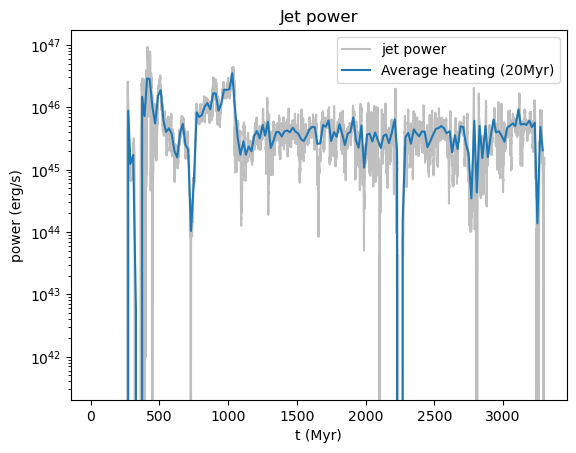

In [9]:
fig, ax = plt.subplots()
ax.plot(result.x, result.value, label=f"jet power", \
        color="gray", alpha=0.5)
ax.plot(resultAvg.x, resultAvg.value, \
        label="Average heating (20Myr)")
ax.set_title("Jet power")
ax.set_xlabel("t (Myr)")
ax.set_ylabel("power (erg/s)")
ax.set_yscale("log")
ax.legend()

### Radiative Cooling

In [15]:
result = TimeSeriesAnalyzor() \
    .setInputs(
        timeSeriesMode=TimeSeriesMode.GasProperty,
        simFile=SimFileModel(
            simPath=simPath,
            hdf5FilePrefix=hdf5Prefix,
            fileSterMyr=1
        ),
        calculationInfo=GasPropertyTimeSeriesCalculationInfoModel(
            tStartMyr=2800,
            tEndMyr=3000,
            tStepMyr=50,
            rKpc=100,
            shape=Shape.Box,
            gasProperty=GasField.Luminosity
        )
    ) \
    .getData()

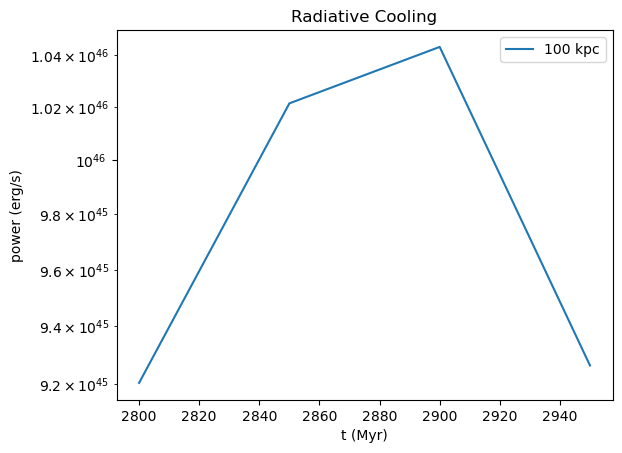

In [16]:
fig, ax = plt.subplots()

ax.plot(result.x, result.value, label=f"{result.label[0]} {result.label[1]}")
ax.set_title("Radiative Cooling")
ax.set_xlabel("t (Myr)")
ax.set_ylabel("power (erg/s)")
ax.set_yscale("log")
ax.legend()